# Триангуляция Делоне. Динамический алгоритм: локализация

## Preliminary

Для реализации динамических алгоритмов вставки и удаления вершины из триангуляции нужно уметь по точке быстро находить треугольник из триангуляции, в котором находится эта точка. 

Напомним некоторые базовые определения и теоремы.

>**Подразбиение Делоне множества точек** — такое разбиение выпуклой оболочки множества точек на множество выпуклых фигур, что в окружности, описанной вокруг любой из фигур, не находится никаких точек из множества.

 

>**Триангуляция Делоне множества точек** — триангуляция, являющаяся подразбиением Делоне.

 

>**Критерий Делоне для ребра** — на ребре можно построить такую окружность, что внутри неё не будет лежать никаких точек.

**Лемма 1** *Триангуляции Делоне принадлежат те и только те рёбра (с поправкой на точки, лежащие на одной окружности), которые удовлетворяют критерию Делоне.*

## Локализационная структура
### Cтруктура
Локализационная структура состоит из нескольких уровней, где каждый уровень — это триангуляция Делоне. На нижнем уровне содержатся все точки. Каждая точка с вероятностью $p$ проходит на следующий уровень (причём если точка — единственная на последнем уровне, то дальше она не пройдёт).

Уровни связаны между собой следующим образом: на уровне $i$ каждая точка содержит указатель на себя же на уровне $i-1$.


### Алгоритм локализации
Как происходит локализация: нам дают точку $v_{i+1}$, которая на предыдущем уровне была ближайшей к точке $q$, которую мы локализуем. Нужно получить следующую точку $v_i$, которая будет ближайшей уже на этом уровне. Делается это следующим образом:
* Находим, в каком из треугольников, смежных с $v_{i+1}$, лежит отрезок $v_{i+1}$ $q$
* Находим, какие рёбра треугольников пересекает $v_{i+1}$ $q$, в итоге находим треугольник, в котором лежит $q$
* Находим ближайшую к $q$ точку. Первым кандидатом на то, чтобы быть ближайшей точкой, становится ближайшая к $q$ вершина найденного в предыдущем пункте треугольника. Для каждого кандидата нужно просмотреть смежные вершины в поиске точки, которая находится ближе к $q$ — эта точка становится следующим кандидатом. Если же среди соседей точки не нашлось более близких, значит, эта точка и есть ближайшая.

### Корректность алгоритма
<img src="https://neerc.ifmo.ru/wiki/images/9/92/Delaunay_localization.png" style="float: right;" />
**Теорема** *Данный алгоритм найдёт ближайшую точку.*
<br>$\triangleright$<br>
<div style="padding-left:40px">Предположим, что это не так. Назовём локализуемую точку $q$, а последнего кандидата на то, чтобы быть ближайшей точкой — $v$. Раз эта точка на самом деле не ближайшая, то в окружности, проходящей через $v$, с центром в точке $q$ найдутся ещё какие-то точки, не смежные с $v$. Проведём через каждую из них окружность, касающуюся изнутри в точке $v$ изначальную окружность. Рассмотрим точку $v'$, через которую проходит наименьшая окружность из построенных. В этой окружности не будет лежать никаких точек, так как мы взяли наименьшую. Значит, ребро $vv'$ удовлетворяет критерию Делоне и должно являться ребром триангуляции (по **лемме 1**), но по предположению этого ребра нет. Значит, предположение неверно.</div>
$\triangleleft$

### Время работы, требуемая память
#### Память
**Лемма 2** *Матожидание числа уровней в локализационной структуре* — $O(\log n)$
<br>$\triangleright$<br><div style="padding-left:40px">
Для оценки матожидания посчитаем вероятность того, что количество уровней $h$ равно $k$ при вероятности пройти на следующий уровень равной $p$.<br>
$p(h \leq k) = (1 - p^{k + 1})^n$, потому что вероятность того, что точка дойдёт до уровня $k + 1$, равна $p^{k + 1}$.<br>
$p(h \geq k) = (1 - (1 - p^k)^n)$, потому что вероятность того, что точка не дойдёт до уровня $k$, равна $1 - p^k$.
$p(h = k) = 1 - p(h > k) - p(h < k) = 1 - (1 - (1 - p^{k + 1})^n) - (1 - p^{k})^n = (1 - p^{k + 1})^n - (1 - p^k)^n \leq 1 - (1 - p^k)^n \leq np^k$
$E(h) = \sum\limits_{k = 1}^{\infty} k \cdot p(h = k) = p(1) \cdot 1 + \dots + p(\log_{1/p} n) \cdot \log_{1/p} n + \sum\limits_{k = \log_{1/p} n + 1}^{\infty} k \cdot p(k)$<br>
Оценим первую сумму:<br>
$p(1) \cdot 1 + \dots + p(\log_{1/p} n) \cdot \log_{1/p} n \leq p(1) \cdot \log_{1/p} n + \dots + p(\log_{1/p} n) \cdot \log_{1/p} n = O(\log(n))$, поскольку сумма этих вероятностей не превосходит единицу.<br>
Оценим вторую сумму:<br>
$\sum\limits_{k = \log_{1/p} n + 1}^{\infty} k \cdot p(k) \leq \sum\limits_{k = \log_{1/p} n}^{\infty} k \cdot n p^k = n \cdot \sum\limits_{k = \log_{1/p} n}^{\infty} k \cdot p^k$<br>
Рассмотрим эту сумму:<br>
$\sum\limits_{k = \log_{1/p} n}^{\infty} k \cdot p^k = p^{\log_{1/p} n} \cdot \sum\limits_{k = 0}^{\infty} (k + \log_{1/p} n) \cdot p^k = p^{\log_{1/p} n} \cdot $<br>$(\sum\limits_{k = 0}^{\infty} (k p^k) + \log_{1/p} n \cdot \sum\limits_{k = 0}^{\infty} (p^k)) =  p^{\log_{1/p} n} \cdot (O(1) + \log_{1/p} n \cdot O(1)) = 1/n \cdot O(\log(n))$<br>
Суммируя всё вышесказанное, получаем, что $O(\log(n))$.
</div>$\triangleleft$

**Теорема** *Локализационная структура занимает $O(n)$ памяти.*<br>
$\triangleright$<br><div style="padding-left:40px">
Триангуляция для $n$ точек занимает $O(n)$ памяти. На нулевом уровне $n$ точек. На уровне $k$ точек $m_k=p \cdot m_{k-1}$. Получим геометрическую прогрессию, сумма которой равна $O(n)$.<br>
</div>$\triangleleft$

#### Время работы
<img src="https://neerc.ifmo.ru/wiki/images/d/d6/Closest_deg.png" style="float: right;" />
**Лемма 3** *Каждая точка на плоскости может являться ближайшей для не более чем шести точек.*
<br>$\triangleright$<br><div style="padding-left:40px">
Предположим, что это не так.

Пусть некоторая точка $u$ является ближайшей для семи точек. Соединим эти семь точек с точкой $u$ отрезками и рассмотрим минимальный из углов, который образуют проведённые отрезки $vu$ и $wu$. Этот угол $\alpha$ меньше $60^{\circ}$ (иначе все семь углов больше либо равны $60^{\circ}$ и их сумма больше $360^{\circ}$).

Так как точка $u$ ближайшая для точек $v$ и $w$, то $vw$ — наибольшая сторона в треугольнике $vwu$. В треугольнике наибольшая сторона лежит напротив наибольшего угла. Но напротив стороны $vw$ лежит угол меньше $60^{\circ}$, значит, сумма углов треугольника меньше $180^{\circ}$. Противоречие. Значит, предположение неверно.
</div>$\triangleleft$

**Лемма 4** *Для заданной точки $q$ на $k$-ом уровне средняя степень ближайшей на $k+1$-ом уровне вершины равна $O(1)$.*
<br>$\triangleright$<br><div style="padding-left:40px">
*Функция nn принимает точку и множество и возвращает ближайшего соседа заданной точки из заданного множества.*<br>

Рассмотрим некоторый уровень $S_k$. Определим множество $R_k=S_k\cup\{q\}$. Рассмотрим все возможные подмножества  $R_k$, равномощные $R_{k+1}$, тем самым рассмотрев все возможные уровни $k+1$. Для каждой точки из каждого подмножества $R'_{k+1}$ рассмотрим степень ближайшей вершины и усредним всё, получив нужную нам оценку.<br>
$E(\operatorname{deg_{S_k}} (\operatorname{nn} (q, S_{k+1}))) = \frac {1} {C^{|R_{k+1}|}_{|R_k|}} \cdot \sum\limits_{R'_{k+1}\subset R_k} \frac {1} {|R_{k+1}|} \sum\limits_{a_i \in R'_{k+1}} \operatorname{deg_{R_k}} (\operatorname{nn}(a_i,R'_{k+1}\backslash\{a_i\}))$<br>

Назовём графом $NN(\{a_i\})$ двудольный граф, в левой и правой долях содержащий точки $\{a_i\}$, рёбра $uv$ которого означают, что точка $v$ является ближайшей для точки $u$ (точка $u$ лежит в левой доли, точка $v$ лежит в правой доли).<br>
Понятно, что $\sum\limits_{a_i \in R'_{k+1}} \operatorname {deg_{R_k}} (\operatorname{nn}(a_i, R'_{k+1}\backslash\{a_i\})) = \sum\limits_{a_i\in R'_{k+1}} \operatorname{deg_{R_k}}(a_i) \cdot \operatorname{deg_{NN(R'_{k+1})}}(a_i)$, так как степень каждой вершины $a_i$ учтётся ровно столько раз, сколько рёбер ей инцидентно в правой доли графа $NN$.<br>
$E(\operatorname{deg_{S_k}} (\operatorname{nn} (q, S_{k+1}))) = \frac {1} {C^{|R_{k+1}|}_{|R_k|}} \sum\limits_{R'_{k+1}\subset R_k} \frac {1} {|R_{k+1}|} \sum\limits_{a_i\in R'_{k+1}} \operatorname{deg_{R_k}}(a_i) \operatorname{deg_{NN(R'_{k+1})}}(a_i)$<br>
По **лемме 3** степень вершины из правой доли графа NN не может быть больше шести.<br>
$E(\operatorname{deg_{S_k}} (\operatorname{nn} (q, S_{k+1}))) \le \frac {1} {C^{|R_{k+1}|}_{|R_k|}} \sum\limits_{R'_{k+1}\subset R_k} \frac {1} {|R_{k+1}|} \sum\limits_{a_i\in R'_{k+1}} \operatorname{deg_{R_k}}(a_i) \cdot 6 = \frac {6} {C^{|R_{k+1}|}_{|R_k|} \cdot |R_{k+1}|} \sum\limits_{R'_{k+1}\subset R_k} \sum\limits_{a_i\in R'_{k+1}} \operatorname{deg_{R_k}} (a_i) = 6 \cdot \frac {\sum_{a_i\in R_k} \operatorname{deg}(a_i)} {|R_k|} = O(1)$
</div>$\triangleleft$

**Лемма 5** *Среднее число точек, лежащих в окружности с центром в точке $q$ и проходящей через $v_{i+1}$, равно $O(1)$.*
<br>$\triangleright$<br><div style="padding-left:40px">
Рассмотрим точки триангуляции $\{a_i\}$. Для каждой точки $a_i$ построим окружность с центром в точке $a_i$, проходящую через ближайшую к ней точку. Докажем, что заданная точка $w$ попадёт в  $O(1)$ таких окружностей на предыдущем уровне. Разделим плоскость на шесть частей прямыми, проходящими через точку $w$. Рассмотрим одну из частей. Отсортируем все точки, попавшие в неё, по увеличению расстояния до $w$. Получим такую последовательность точек $\{a_0, a_1, ...\}$, что $|wa_i|\le|wa_{i+1}|$. Заметим, что если какая-нибудь точка $a_i$ содержится на предыдущем уровне, то все точки, начиная с $a_{i+1}$ уже не содержат в своей окружности точку $w$. Таким образом, среднее число точек $k$, в окружности которых содержится точка $w$:<br>
$E(k)\le6\cdot\sum_i i(1-p)^i p = O(1)$<br>
Таким образом, каждая точка содержится в $O(1)$ окружностей, значит, каждая окружность содержит $O(1)$ точек.
</div><br>$\triangleleft$

**Лемма 6** *Среднее число рёбер, пересечённое отрезком $qv_{i+1}$ во втором этапе алгоритма локализации, равно $O(1)$.*
<br>$\triangleright$<br><div style="padding-left:40px">
Рассмотрим рёбра, пересекающие $qv_{i+1}$, для которых хотя бы одна из граничных точек окажется в окружности с центром в точке $q$, проходящей через $v_{i+1}$. Число таких рёбер не превосходит суммы степеней вершин, лежащих внутри окружности. А по **лемме 5** число таких точек равно $O(1)$. При этом средняя степень вершины равна $O(1)$. Таким образом, число таких рёбер равно $O(1)$.

Докажем, что число рёбер, пересекающих $qv_{i+1}$, для которых обе граничные точки лежат вне окружности, тоже равно $O(1)$. При вставке точки $q$ в триангуляцию для этих рёбер перестанет выполняться критерий Делоне: в любой окружности, построенной на ребре как на хорде, будет содержаться либо точка $q$, либо точка $v_{i+1}$. Поэтому эти рёбра придётся флипнуть. Число флипов при вставке точки равно $O(1)$, поэтому число таких рёбер равно $O(1)$.

Итого число рёбер, пересекающих $qv_{i+1}$, равно $O(1)$.
</div>$\triangleleft$

**Лемма 7** *Среднее число треугольников, посещённых на третьем этапе алгоритма локализации, равно $O(1)$.*
<br>$\triangleright$<br><div style="padding-left:40px">
Каждый рассмотренный треугольник имеет хотя бы одну вершину внутри окружности, проведённой через $v_{i+1}$, с центром в точке $q$. То есть число таких треугольников не больше числа точек внутри этой окружности. Таких точек по **лемме 4** $O(1)$, значит, число треугольников тоже равно $O(1)$.
</div>$\triangleleft$

**Лемма 8** *Локализация точки на каждом уровне происходит за $O(1)$.*
<br>$\triangleright$<br><div style="padding-left:40px">
Докажем, что каждый этап локализации происходит за $O(1)$.
**1 этап**: по **лемме 4** средняя степень вершины $v_{i+1}$ равна $O(1)$, поэтому треугольников, в которых может лежать отрезок $qv_{i+1}$ тоже $O(1)$. Просмотрев их все, за $O(1)$ можно понять, в каком из них лежит отрезок $qv_{i+1}$.

**2 этап**: число рёбер, пересечённых отрезком $qv_{i+1}$, равно $O(1)$ (по **лемме 6**). Поэтому этот этап локализации тоже происходит за $O(1)$.

**3 этап**: число треугольников, посещённых на третьем этапе локализации, равно O(1) (по **лемме 7**).

</div>$\triangleleft$

**Теорема** *Локализация точки в триангуляции происходит за $O(\log n)$.*
<br>$\triangleright$<br><div style="padding-left:40px">
Очевидное следствие из **леммы 2** и **леммы 8**.
</div>$\triangleleft$

## Визуализация


In [174]:
from random import randint
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import numpy as np
from random import random
from ipywidgets import interact
import time

0.0


<IPython.core.display.Javascript object>


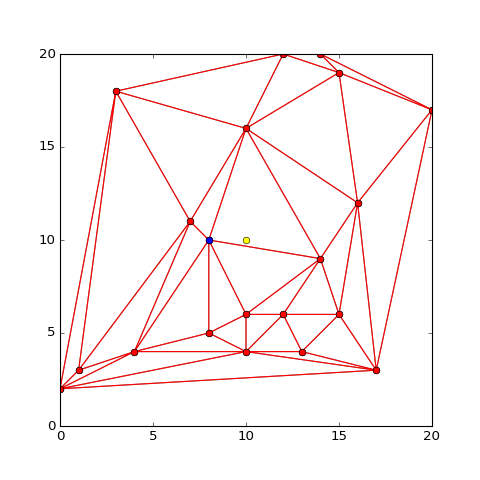

<function __main__.changeLevel>

In [175]:
def generatePoints(n, N):
    points = {(randint(0, n), randint(0, n)) for i in range(N)}
    while len(points) < N:
        points |= {(randint(0, n), randint(0, n))}
    return list(list(x) for x in points)

def pushPoints(levels, probability):
    if (len(levels[-1]) == 1):
        return
    levels.append([])
    for p in levels[-2]:
        if (random() < probability):
            levels[-1] += [p]
    if len(levels[-1]) == 0:
        del levels[-1]
    elif len(levels[-1]) == len(levels[-2]):
        del levels[-1]
        pushPoints(levels, probability)
    else:
        pushPoints(levels, probability)

def createLevels(points, probability):
    levels = [[]]
    for p in points:
        levels[-1] += [tuple(p)]
    pushPoints(levels, probability)
    return levels

points = generatePoints(20, 20)
levels = createLevels(points, .7)

def findClosest(q, points):
    def dist(x):
        return (x[0] - q[0]) * (x[0] - q[0]) + (x[1] - q[1]) * (x[1] - q[1])
    return sorted(points, key=dist)[0]

def redrawClosest(q, points, ax1):
    if redrawClosest.closestPoint is not None:
        redrawClosest.closestPoint.remove()
    closest = findClosest((q.get_xdata()[0], q.get_ydata()[0]), points)
    redrawClosest.closestPoint, = ax1.plot([closest[0]], [closest[1]], 'o', color='blue')
redrawClosest.closestPoint = None

currentLevel = 0

def printLevel(fig, ax1, q, levels, i, isBackground = False):
    global currentLevel
    currentLevel = i
    
    if printLevel.prevEdges is not None:
        for x in printLevel.prevEdges:
            x.remove()
        printLevel.prevEdges = None
    if printLevel.prevPoints is not None:
        printLevel.prevPoints.remove()
            
    color = 'grey' if isBackground else 'red'
    
    points = np.array(levels[i])
    if (len(points) == 3):
        printLevel.prevEdges = ax1.triplot(points[:, 0], points[:, 1], np.array([[0, 1, 2]]), color=color)
    if (len(points) >= 4):
        tri = Delaunay(points)
        printLevel.prevEdges = ax1.triplot(points[:, 0], points[:, 1], tri.simplices.copy(), color=color)
    printLevel.prevPoints, = ax1.plot(points[:, 0], points[:, 1], 'o', color=color)
    if isBackground:
        printLevel.prevPoints = printLevel.prevEdges = None
        
    redrawClosest(q, points, ax1)
    
    display(fig)
    ax1.set_xlim(0, 20)
    ax1.set_ylim(0, 20)
printLevel.prevPoints = printLevel.prevEdges = None

fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111, aspect='equal')

q, = ax1.plot([10], [10], 'o', color='yellow')

def onRelease(event):
    global q, currentLevel, levels, ax1
    if q is not None:
        q.remove()
    q, = ax1.plot([event.xdata], [event.ydata], 'o', color='yellow')
    points = np.array(levels[currentLevel])
    redrawClosest(q, points, ax1)
    display(fig)

fig.canvas.mpl_connect('button_release_event', onRelease)

printLevel(fig, ax1, q, levels, 0, True)

def changeLevel(r = 0):
    printLevel(fig, ax1, q, levels, r)

interact(changeLevel, r = (0, len(levels) - 1))